In [1]:
# ==================== CHECK EXISTING FILES ====================
print("🔍 Checking existing files in Google Drive...")

from google.colab import drive
import os

drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/DeepLearningProject/'

# List all files in the folder
if os.path.exists(drive_path):
    files = os.listdir(drive_path)
    print("📁 Files found:")
    for file in files:
        print(f"   - {file}")
else:
    print("❌ Folder not found")
    files = []

🔍 Checking existing files in Google Drive...
Mounted at /content/drive
📁 Files found:
   - unzipped_data
   - cnn_model_predictions.csv
   - dense_model_predictions.csv


🔄 Loading data and models for evaluation...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1. Loading Dense model predictions...
✅ Dense model loaded successfully
   Samples: 18
   MAE:  0.0384
   R²:   0.5084

2. Loading other models for comparison...
✅ CNN loaded: MAE=0.0187, R²=0.2138
⚠️  Linear Regression results not found (create this file if needed)

FINAL MODEL COMPARISON:

DENSE MODEL:
  MAE:  0.0384
  R²:   0.5084
  🥇 BEST R²

CNN:
  MAE:  0.0187
  R²:   0.2138
  🥇 BEST MAE

🏆 OVERALL BEST:
  Best R²:  Dense Model (0.5084)
  Best MAE: CNN (0.0187)

📊 Creating comparison visualization...


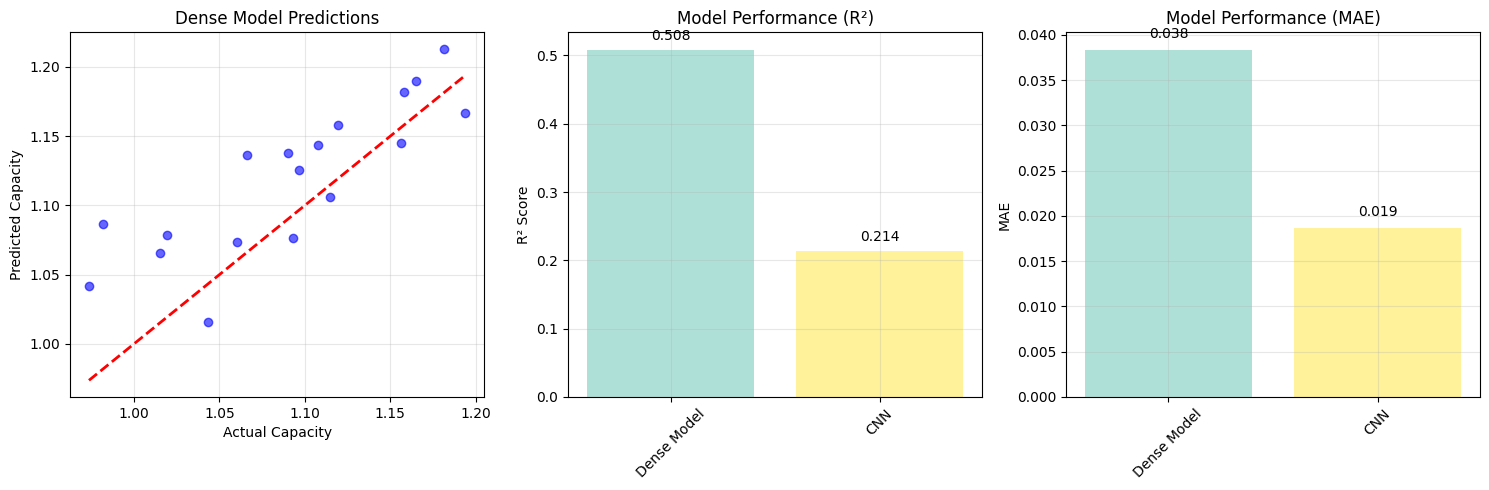

🎯 MODEL EVALUATION COMPLETED!


In [2]:
# ==================== EVALUATION FOR NEW SESSION ====================
print("🔄 Loading data and models for evaluation...")

from google.colab import drive
import os
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/DeepLearningProject/'

# ==================== 1. LOAD DENSE MODEL PREDICTIONS ====================
print("1. Loading Dense model predictions...")

dense_results_path = drive_path + 'dense_model_predictions.csv'
if os.path.exists(dense_results_path):
    dense_results = pd.read_csv(dense_results_path)
    y_test = dense_results['actual']
    dense_predictions = dense_results['predicted']

    # Calculate Dense model metrics
    dense_mae = mean_absolute_error(y_test, dense_predictions)
    dense_rmse = np.sqrt(mean_squared_error(y_test, dense_predictions))
    dense_r2 = r2_score(y_test, dense_predictions)

    print("✅ Dense model loaded successfully")
    print(f"   Samples: {len(y_test)}")
    print(f"   MAE:  {dense_mae:.4f}")
    print(f"   R²:   {dense_r2:.4f}")
else:
    print("❌ Dense model results not found!")
    # Exit if no dense results
    raise FileNotFoundError("Dense model predictions file not found")

# ==================== 2. LOAD AND COMPARE WITH OTHER MODELS ====================
print("\n2. Loading other models for comparison...")
comparison_models = {}

# Add Dense model to comparison
comparison_models['Dense Model'] = {'mae': dense_mae, 'r2': dense_r2}

# Check and load CNN results
cnn_path = drive_path + 'cnn_model_predictions.csv'
if os.path.exists(cnn_path):
    cnn_results = pd.read_csv(cnn_path)
    cnn_mae = mean_absolute_error(cnn_results['actual'], cnn_results['predicted'])
    cnn_r2 = r2_score(cnn_results['actual'], cnn_results['predicted'])
    comparison_models['CNN'] = {'mae': cnn_mae, 'r2': cnn_r2}
    print(f"✅ CNN loaded: MAE={cnn_mae:.4f}, R²={cnn_r2:.4f}")

# Check for Linear Regression results
lr_path = drive_path + 'linear_regression_predictions.csv'
if os.path.exists(lr_path):
    lr_results = pd.read_csv(lr_path)
    lr_mae = mean_absolute_error(lr_results['actual'], lr_results['predicted'])
    lr_r2 = r2_score(lr_results['actual'], lr_results['predicted'])
    comparison_models['Linear Regression'] = {'mae': lr_mae, 'r2': lr_r2}
    print(f"✅ Linear Regression loaded: MAE={lr_mae:.4f}, R²={lr_r2:.4f}")
else:
    print("⚠️  Linear Regression results not found (create this file if needed)")

# ==================== 3. COMPARE ALL MODELS ====================
print("\n" + "="*60)
print("FINAL MODEL COMPARISON:")
print("="*60)

# Find best model
best_r2_model = max(comparison_models.items(), key=lambda x: x[1]['r2'])
best_mae_model = min(comparison_models.items(), key=lambda x: x[1]['mae'])

for model_name, metrics in comparison_models.items():
    print(f"\n{model_name.upper()}:")
    print(f"  MAE:  {metrics['mae']:.4f}")
    print(f"  R²:   {metrics['r2']:.4f}")

    if model_name == best_mae_model[0]:
        print(f"  🥇 BEST MAE")
    if model_name == best_r2_model[0]:
        print(f"  🥇 BEST R²")

print(f"\n🏆 OVERALL BEST:")
print(f"  Best R²:  {best_r2_model[0]} ({best_r2_model[1]['r2']:.4f})")
print(f"  Best MAE: {best_mae_model[0]} ({best_mae_model[1]['mae']:.4f})")

# ==================== 4. CREATE COMPARISON VISUALIZATION ====================
print("\n📊 Creating comparison visualization...")

plt.figure(figsize=(15, 5))

# Plot 1: Dense Model predictions
plt.subplot(1, 3, 1)
plt.scatter(y_test, dense_predictions, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Capacity')
plt.ylabel('Predicted Capacity')
plt.title('Dense Model Predictions')
plt.grid(True, alpha=0.3)

# Plot 2: R² comparison
plt.subplot(1, 3, 2)
models = list(comparison_models.keys())
r2_scores = [comparison_models[m]['r2'] for m in models]
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

bars = plt.bar(models, r2_scores, color=colors, alpha=0.7)
plt.ylabel('R² Score')
plt.title('Model Performance (R²)')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)

# Plot 3: MAE comparison
plt.subplot(1, 3, 3)
mae_scores = [comparison_models[m]['mae'] for m in models]
bars = plt.bar(models, mae_scores, color=colors, alpha=0.7)
plt.ylabel('MAE')
plt.title('Model Performance (MAE)')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, score in zip(bars, mae_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
             f'{score:.3f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎯 MODEL EVALUATION COMPLETED!")